In [1]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import numpy as np
import pickle
from sklearn.utils import shuffle
from joblib import dump as j_dump
from joblib import load as j_load
import time
import random
import os

In [2]:
# # Uncomment this box if the file is in google drive
# # Create your own direcotry in your google drive and change path2root var.
# path2root = "/content/drive/MyDrive/Projects/EyeTracker/"

In [3]:
# Uncomment this box if the file is in your local directory
path2root = "../../"

In [18]:
models_fol = "models/"
models_et_fol = "et/"
raw_fol = "raw/"
trained_fol = "trained/"
selected_model_num = 1
raw_models_numbers = 1
subjects_fol = "subjects/"
sbj_scalers_boi_name = "scalers-boi.bin"
sbj_model_boi_name = "model-boi"
subjects = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
data_et_fol = "data-et-clb/"
chosen_inputs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
r_train = 0.85
n_epochs = 1
patience = 1
min_brightness_ratio = 0.65
max_brightness_ratio = 1.45
y_scale = 10000

In [5]:
# x1_load = []
# x2_load = []
# y_load = []
# subjects_dir = path2root + subjects_fol

# for sbj in subjects:
#     sbj_dir = subjects_dir + f"{sbj}/"
#     sbj_model_boi_dir = sbj_dir + sbj_model_boi_name
#     sbj_scalers_boi_dir = sbj_dir + sbj_scalers_boi_name
#     data_et_dir = sbj_dir + data_et_fol
    
#     with open(data_et_dir + "x1.pickle", "rb") as f:
#         sbj_x1_load = pickle.load(f)
#     with open(data_et_dir + "x2.pickle", "rb") as f:
#         sbj_x2_load = pickle.load(f)
#     with open(data_et_dir + "y.pickle", "rb") as f:
#         sbj_y_load = pickle.load(f)
    
# #     sbj_x2_chs_inp = sbj_x2_load[:, chosen_inputs]
# #     sbj_scalers_boi = j_load(sbj_scalers_boi_dir)
# #     sbj_x1_scaler_boi, sbj_x2_scaler_boi = sbj_scalers_boi
# #     sbj_x1 = sbj_x1_load / sbj_x1_scaler_boi
# #     sbj_x2 = sbj_x2_scaler_boi.transform(sbj_x2_chs_inp)
    
# #     sbj_model_boi = load_model(sbj_model_boi_dir)
    
# #     sbj_yhat_boi = sbj_model_boi.predict([sbj_x1, sbj_x2]).argmax(1)
    
#     for (x10, x20, y0) in zip(sbj_x1_load, sbj_x2_load, sbj_y_load):
#         if True:  # yht0 != 0:
#             x1_load.append(x10)
#             x2_load.append(x20)
#             y_load.append(y0)

# x1_load = np.array(x1_load)
# x2_load = np.array(x2_load)
# y_load = np.array(y_load)

# n_smp, frame_h, frame_w = x1_load.shape[:-1]
# print(n_smp, frame_h, frame_w)

221000 100 100


In [6]:
# x1_chg_bri = x1_load.copy()
# for (i, _) in enumerate(x1_chg_bri):
#     r = random.uniform(min_brightness_ratio, max_brightness_ratio)
#     x1_chg_bri[i] = (x1_chg_bri[i] * r).astype(np.uint8)

In [7]:
# x2_chs_inp = x2_load[:, chosen_inputs]

In [8]:
# import matplotlib.pyplot as plt

[ 2.9642051   0.23685921 -0.53444146 -1.05929972  4.75120514 70.03728589
  0.4750874   0.4842242   0.44935393  0.43331644]
[0.004 0.016]


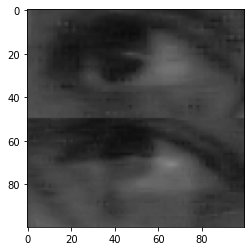

In [9]:
# smp_num = 2
# print(x2_chs_inp[smp_num])
# print(y_load[smp_num])
# plt.imshow(x1_chg_bri[smp_num].reshape((frame_h, frame_w)),
#            cmap="gray", vmin=0, vmax=255)
# plt.show()

In [ ]:
# x1_scaler = 255
# x1 = x1_chg_bri / x1_scaler

# x2_scaler = StandardScaler()
# x2 = x2_scaler.fit_transform(x2_chs_inp)

# scalers = [x1_scaler, x2_scaler]

In [11]:
# x1_shf, x2_shf, y_hrz_shf, y_vrt_shf = shuffle(x1, x2, y[:, 0], y[:, 1])

# n_train = int(r_train * n_smp)
# n_val = n_smp - n_train
# x1_train, x2_train = x1_shf[:n_train], x2_shf[:n_train]
# x1_val, x2_val = x1_shf[n_train:], x2_shf[n_train:]
# y_hrz_train, y_vrt_train = y_hrz_shf[:n_train], y_vrt_shf[:n_train]
# y_hrz_val, y_vrt_val = y_hrz_shf[n_train:], y_vrt_shf[n_train:]

# x_train_list = [x1_train, x2_train]
# x_val_list = [x1_val, x2_val]

# print(x1_train.shape, x1_val.shape, y_hrz_train.shape, y_hrz_val.shape,
#       x2_train.shape, x2_val.shape, y_vrt_train.shape, y_vrt_val.shape)

(20825, 48, 44, 1) (3675, 48, 44, 1) (20825,) (3675,) (20825, 7) (3675, 7) (20825,) (3675,)


In [5]:
dataset_dir = path2root + "dataset/et/"
with open(dataset_dir + "x1_train.pickle", 'rb') as f:
    x1_train = pickle.load(f)
with open(dataset_dir + "x2_train.pickle", 'rb') as f:
    x2_train = pickle.load(f)
with open(dataset_dir + "x1_val.pickle", 'rb') as f:
    x1_val = pickle.load(f)
with open(dataset_dir + "x2_val.pickle", 'rb') as f:
    x2_val = pickle.load(f)
with open(dataset_dir + "y_hrz_train.pickle", 'rb') as f:
    y_hrz_train = pickle.load(f)
with open(dataset_dir + "y_hrz_val.pickle", 'rb') as f:
    y_hrz_val = pickle.load(f)
with open(dataset_dir + "y_vrt_train.pickle", 'rb') as f:
    y_vrt_train = pickle.load(f)
with open(dataset_dir + "y_vrt_val.pickle", 'rb') as f:
    y_vrt_val = pickle.load(f)

    
frame_h, frame_w = x1_train.shape[1:-1]
print(x1_train.shape, x1_val.shape, x2_train.shape, x2_val.shape,
      y_hrz_train.shape, y_hrz_val.shape, y_vrt_train.shape, y_vrt_val.shape)

NameError: name 'y_train' is not defined

In [ ]:
x_train_list = [x1_train, x2_train]
x_val_list = [x1_val, x2_val]

del x1_train
del x1_val

In [19]:
cb = EarlyStopping(patience=patience, verbose=1, restore_best_weights=True)

In [ ]:
# raw_models_dir = path2root + models_fol + models_et_fol + raw_fol
# model_hrz = load_model(raw_models_dir + f"model{selected_model_num}-hrz.h5")
# model_vrt = load_model(raw_models_dir + f"model{selected_model_num}-vrt.h5")
# print(model_hrz.summary())

In [10]:
raw_models_dir = path2root + models_fol + models_et_fol + raw_fol
y_hrz_train_rescale = y_hrz_train * y_scale
y_hrz_val_rescale = y_hrz_val * y_scale
y_vrt_train_rescale = y_vrt_train * y_scale
y_vrt_val_rescale = y_vrt_val * y_scale

trained_dir = path2root + models_fol + models_et_fol + trained_fol
if not os.path.exists(trained_dir):
    os.mkdir(trained_dir)

for i in range(1, raw_models_numbers + 1):
    model_hrz = load_model(raw_models_dir + f"model{selected_model_num}-hrz.h5")
    model_vrt = load_model(raw_models_dir + f"model{selected_model_num}-vrt.h5")
    
    if models_name:
        for mn in models_name:
            if mn[:5] == "model":
                mn0 = int(mn[5:-7])
                models_numbers.append(mn0)
        max_num = max(models_numbers)
    else:
        max_num = 0

    results_hrz = model_hrz.fit(x_train_list,
                                y_hrz_train_rescale,
                                validation_data=(x_val_list, y_hrz_val_rescale),
                                epochs=n_epochs,
                                callbacks=cb)
    model_hrz.save(trained_dir + f"model{max_num+1}-hrz.h5")
    
    results_vrt = model_vrt.fit(x_train_list,
                                y_vrt_train_rescale,
                                validation_data=(x_val_list, y_vrt_val_rescale),
                                epochs=n_epochs,
                                callbacks=cb)
    model_vrt.save(trained_dir + f"model{max_num+1}-vrt.h5")

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 100, 100, 1) 0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 100, 100, 16) 1952        input_5[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_8 (MaxPooling2D)  (None, 50, 50, 16)   0           conv2d_8[0][0]                   
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 50, 50, 32)   25120       max_pooling2d_8[0][0]            
____________________________________________________________________________________________

In [20]:
# results_hrz = model_hrz.fit([x1_train, x2_train],
#                             y_hrz_train * y_scale,
#                             validation_data=([x1_val, x2_val], y_hrz_val * y_scale),
#                             epochs=n_epochs,
#                             callbacks=cb)

KeyboardInterrupt: 

In [15]:
# results_vrt = model_vrt.fit([x1_train, x2_train],
#                             y_vrt_train * y_scale,
#                             validation_data=([x1_val, x2_val], y_vrt_val * y_scale),
#                             epochs=n_epochs,
#                             callbacks=cb)

Epoch 1/2
651/651 [==============================] - 28s 42ms/step - loss: 0.3695 - val_loss: 0.3188
Epoch 2/2
651/651 [==============================] - 28s 43ms/step - loss: 0.3023 - val_loss: 0.2992


In [16]:
# y_hrz_hat_train = model_hrz.predict(x_train_list).reshape((n_train,))
# y_hrz_hat_test = model_hrz.predict(x_test_list).reshape((n_test,))
# y_vrt_hat_train = model_vrt.predict(x_train_list).reshape((n_train,))
# y_vrt_hat_test = model_vrt.predict(x_test_list).reshape((n_test,))

In [17]:
# min_out_ratio = 0.005
# max_out_ratio = 0.995

# y_hrz_hat_train[y_hrz_hat_train < min_out_ratio] = min_out_ratio
# y_hrz_hat_test[y_hrz_hat_test < min_out_ratio] = min_out_ratio
# y_vrt_hat_train[y_vrt_hat_train < min_out_ratio] = min_out_ratio
# y_vrt_hat_test[y_vrt_hat_test < min_out_ratio] = min_out_ratio

# y_hrz_hat_train[y_hrz_hat_train > max_out_ratio] = max_out_ratio
# y_hrz_hat_test[y_hrz_hat_test > max_out_ratio] = max_out_ratio
# y_vrt_hat_train[y_vrt_hat_train > max_out_ratio] = max_out_ratio
# y_vrt_hat_test[y_vrt_hat_test > max_out_ratio] = max_out_ratio

Train
(3594, 474)
(3576, 1886)
Test
(599, 948)
(3576, 1886)


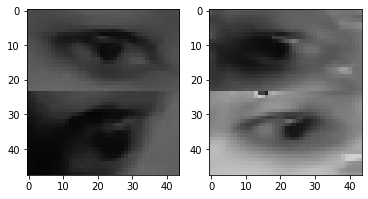

In [18]:
# smp_num = 1
# print("Train")
# y_scalers_et = np.array([1280, 720])
# sample_train = (int(y_hrz_train[smp_num] * y_scalers[0]),
#                 int(y_vrt_train[smp_num] * y_scalers[1]))
# sample_train_hat = (int(y_hrz_hat_train[smp_num] * y_scalers[0]),
#                     int(y_vrt_hat_train[smp_num] * y_scalers[1]))
# print(sample_train)
# print(sample_train_hat)

# print("Test")
# sample_test = (int(y_hrz_test[smp_num] * y_scalers[0]),
#                int(y_vrt_test[smp_num] * y_scalers[1]))
# sample_test_hat = (int(y_hrz_hat_test[smp_num] * y_scalers[0]),
#                    int(y_vrt_hat_test[smp_num] * y_scalers[1]))
# print(sample_test)
# print(sample_test_hat)

# _, ax = plt.subplots(1, 2)
# ax[0].imshow((x1_train[smp_num] * x1_scaler).astype(np.uint8).
#              reshape((frame_h, frame_w)), cmap="gray", vmin=0, vmax=255)
# ax[1].imshow((x1_test[smp_num] * x1_scaler).astype(np.uint8).
#              reshape((frame_h, frame_w)), cmap="gray", vmin=0, vmax=255)

In [19]:
# train_loss = np.abs(y_train - yhat_train).sum(0) / n_train
# test_loss = np.abs(y_test - yhat_test).sum(0) / n_test

In [16]:
# trained_dir = path2root + models_fol + models_et_fol + trained_fol
# if not os.path.exists(trained_dir):
#     os.mkdir(trained_dir)

In [17]:
# models_numbers = []
# models_name = os.listdir(trained_dir)
# if models_name:
#     for mn in models_name:
#         if mn[:5] == "model":
#             mn0 = int(mn[5:6])
#             models_numbers.append(mn0)
#     max_num = max(models_numbers)
# else:
#     max_num = 0

# model_hrz.save(trained_dir + f"model{max_num+1}-hrz.h5")
# model_vrt.save(trained_dir + f"model{max_num+1}-vrt.h5")

# # scalers_dir = path2root + models_fol + models_et_fol + trained_fol + f"scalers{max_num+1}.bin"
# # j_dump(scalers, scalers_dir)